In [2]:
# BRIE2 option 2: splicing quantification
import os
import brie
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [17]:
#PSI quantification output file -> BRIE2 option 2: splicing quantification and usage
adata= anndata.read_h5ad("./brieQuant_mode2-diff/brie_quant_cell.h5ad")
adata_aggr = sc.read_h5ad("./brieQuant_mode2-quant/brie_quant_aggr.h5ad")
adata_aggr.layers['Psi'].shape


(808, 65)

In [2]:
df = pd.DataFrame({'GeneName': adata_aggr.var['GeneName'], 
                   'Psi': adata_aggr.layers['Psi'], 
                   'n_counts': adata_aggr.var['n_counts']})
df.plot(x="GeneName", y=["n_counts"], kind="bar", figsize=(10,3))

NameError: name 'pd' is not defined

In [1]:
# print(df['Psi'])
# df.plot(x="GeneName", y=["meanPsi"], kind="bar", figsize=(10,3))

In [108]:
# adata preparation for index change
# Change gene index from Ensembl id to gene name
adata.var['old_index'] = adata.var.index
new_index = [adata.var.GeneName[i] + adata.var.GeneID[i][18:] for i in range(adata.shape[1])]
adata.var.index = new_index

In [15]:
## change gene index
print(np.mean(adata.var['old_index'] == adata_aggr.var.index))

adata_aggr.var.index = adata.var.index
# print(adata_aggr.var.index )

1.0


In [142]:
# Add meta data and gene-level annotation
dat_umap = np.genfromtxt('./brieCount/cell_note.tsv', dtype='str', delimiter='\t')
# print(dat_umap.shape)
mm = brie.match(adata_aggr.obs.index, dat_umap[:, 0])
idx = mm[mm != None].astype(int)
# print(adata_aggr.shape)
adata_aggr = adata_aggr[idx-1, :]
adata_aggr.obsm['X_GEX_UMAP'] = dat_umap[idx, 1:3].astype(float)
# adata_aggr.obs['cluster'] = dat_umap[idx, 3]
# adata_aggr.obs['combine'] = [adata_aggr.obs['cluster'][i] + '-' + adata_aggr.obs['MS'][i]
#                             for i in range(adata_aggr.shape[0])]



IndexError: index 3 is out of bounds for axis 1 with size 2

In [145]:
# Add devstages to obs
# anno = pd.read_csv('./out.csv', names=['IDs', 'stage'])
# # print(anno)
# adata_aggr.obs['devstage'] = anno['stage'].values
print(adata_aggr)

View of AnnData object with n_obs × n_vars = 808 × 65
    obs: 'samID', 'samCOUNT', 'devstage'
    var: 'GeneID', 'GeneName', 'TranLens', 'TranIDs', 'chrom', 'ExonSS', 'n_counts', 'n_counts_uniq', 'loss_gene'
    uns: 'brie_losses', 'brie_param', 'brie_version'
    obsm: 'Xc', 'X_GEX_UMAP'
    varm: 'cell_coeff', 'effLen', 'intercept', 'p_ambiguous', 'sigma'
    layers: 'Psi', 'Psi_95CI', 'Z_std', 'ambiguous', 'isoform1', 'isoform2', 'poorQual'


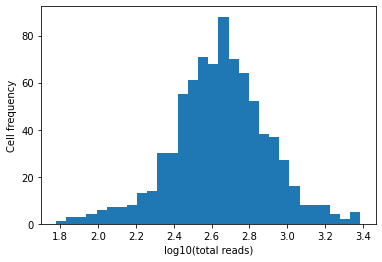

In [10]:
# Cell filtering could be done here with min_reads
plt.hist(np.log10(adata.X.sum(1)[:, 0] + 1), bins=30)
plt.xlabel("log10(total reads)")
plt.ylabel("Cell frequency")
plt.show()

In [149]:
sc.pl.scatter(adata_aggr, basis='GEX_UMAP', color=['devstage'], size=3)

ValueError: Either provide a `basis` or `x` and `y`.